<b>There are different metrics developed to measure the success of a calculated model. The first of these is $R^{2}$. $R^{2}$ gives the variance in a model the rate at which it is explained by the independent variables. RSS(residual sum of squares) $e_{1}^{2}+e_{2}^{2}+...+e_{n}^{2}$ It gives the value of the sum of the squares of the remainders. TSS(total sum of squares) gives the $\sum\left ( y_{i}-\bar{y} \right ) ^{2}$ value. This value gives us the sum of the squares of the difference of the dependent variables from the mean. In this case, it is calculated as $R^{2}$,$1-RSS/TSS$.</b>

- <b>Now let's create a model</b>

In [10]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

bostondf = pd.read_csv('Boston.csv')

x = bostondf[['lstat','age']].values
y = bostondf['medv'].values

model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

- <b>The $R^{2}$ value calculated in the model is calculated with the .score() method.</b>

In [11]:
model.score(x,y)

0.5512689379421003

- <b>Another method is as follows.</b>

In [12]:
yh =model.predict(x)
RSS = sum((y-yh)**2)
TSS = sum((y-np.mean(y))**2)
R2 = 1 - RSS/TSS
R2

0.5512689379421007

<b>ADJUSTED $R^{2}$ : </b>

<b>The downside of the $R^{2}$ value is that this value increases with the number of non-dependent variables. Therefore, whatever new variables are added to a model dependent variable, the $R^{2}$ value will increase. To eliminate this negativity, the adjusted $R^{2}$ value is calculated.</b>

- $Adjusted R^{2} = 1 - \frac{\frac{RSS}{(n-d-1)}}{\frac{TSS}{(n-1)}}$
<b>n = number of observations in the equation, d = number of non-dependent variables in the equation.</b>
<b>The logic behind the calculation is this: When a non-dependent variable is added to the model, the d value will increase, but the RSS/(n-d-1) value will also increase. Therefore, in a model with a high theoretically adjusted $R^{2}$ value, only the correct variables will theoretically be included. (James, Witten, Hasite, & Tibshirani, 2017).</b>
- We can calculate the adjusted $R^{2}$ value in Python as follows.

In [13]:
n = len(y)
d = x.shape[1]

adj_R2 = 1 - (RSS/(n-d-1))/(TSS/(n-1))
adj_R2

0.5494847190074768

<b>Don't be fooled by the word linear in the linear regression expression. This expression does not mean that the relationship is linear. It means that the coefficients, namely betas, are first order. Therefore, it is possible to use the exponential values of the non-dependent variables while developing a linear regression model.
For example, if we look at the graph showing the relationship between MEDV and LSTAT, we can notice that the relationship is nonlinear rather like a polynomial. Therefore, let's develop a model using the second and third degree exponents of the LSTAT variable.</b>

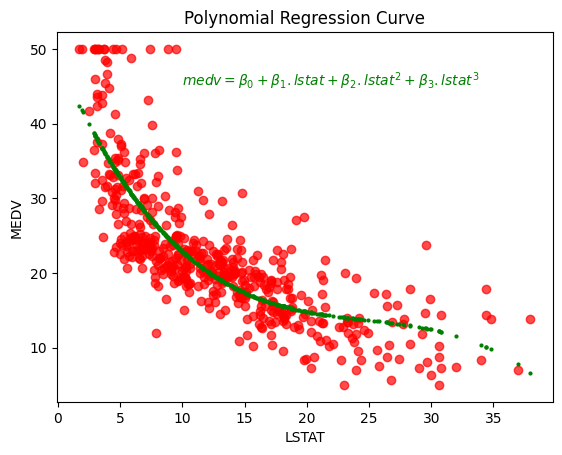

In [14]:
bostondf['lstat2'] = bostondf['lstat']**2
bostondf['lstat3'] = bostondf['lstat']**3

x = bostondf[['lstat','lstat2','lstat3']].values

y = bostondf[['medv']].values

model = linear_model.LinearRegression()
model.fit(x,y)

plt.scatter(x[:,0],y,color='red',alpha=0.7)
plt.scatter(x[:,0],model.predict(x),s=4,color='green')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.text(10,45,r'$medv=\beta_0+\beta_1.lstat+\beta_2.lstat^2+\beta_3.lstat^3$',color='green')
plt.title('Polynomial Regression Curve')
plt.show()

<b>When the seaborn.regplot() method is necessary, we can draw two or higher order regression graphs and examine which one reflects the relationship better.
With the 'order' argument we specify the degree of relationship.</b>

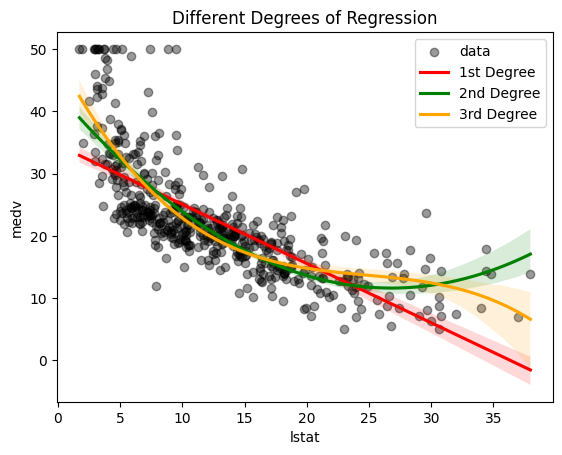

In [15]:
import seaborn as sns

plt.scatter(bostondf['lstat'],bostondf['medv'],label='data',color='black',marker='o',alpha=0.4)
sns.regplot(x='lstat',y='medv',data=bostondf,scatter=None,order=1,color='red',label='1st Degree')
sns.regplot(x='lstat',y='medv',data=bostondf,scatter=None,order=2,color='green',label='2nd Degree')
sns.regplot(x='lstat',y='medv',data=bostondf,scatter=None,order=3,color='orange',label='3rd Degree')
plt.legend(loc='upper right')
plt.title('Different Degrees of Regression')
plt.show()

<b>Another criterion that measures the success of the linear regression model is the root mean square error(RMSE). This value is calculated with the following formula:</b>

- $RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\bar{y_{i}})^{2}}{n}}$

<b>n=number of data
$y_{i}$=observed value of the dependent variable
$\bar{y_{i}}$=value of the dependent variable calculated according to the model
A low RMSE is preferred in a model.</b>

<b>To calculate the RMSE value in Python, the mean_squared_error() function from the sklearn.metrics module is used. Note, however, that this function calculates 'mean square error(MSE)'. Therefore, we need to take the square root of the result. Let's find the RMSE value of the $medv =\beta_0+\beta_1.lstat $ model using this method.</b>

In [16]:
from sklearn.metrics import mean_squared_error

model = linear_model.LinearRegression()

lstat = bostondf[['lstat']].values
medv = bostondf[['medv']].values

model.fit(lstat,medv)

medv_estimate = model.predict(lstat)

rmse = np.sqrt(mean_squared_error(medv_estimate,medv))

rmse

6.20346413142642

<b>To evaluate whether the RMSE value is high or low, it is necessary to compare this value with the standard deviation of the dependent variable. The fact that the RMSE value of the model we set up is lower than the standard deviation of the dependent variable indicates that the model we set up expresses progress.</b>

In [17]:
np.std(medv)

9.188011545278203

<b>There are different criteria that can be used to measure the success of a model. These criteria generally penalize the number of variables and prevent unnecessary variables from being included in the models.</b>

- Mallow Cp :
- $C_{p} = \frac{1}{n}(RSS + 2d\bar{\sigma }^{2})$
<b>$\bar{\sigma }^{2}$ : standard deviation of error terms</b>
<b>Adding $2d\bar{\sigma }^{2}$ to the RSS value in the $C_{p}$ calculation allows the $C_{p}$  value to increase as unnecessary non-dependent variables increase.</b>
- We can calculate the $C_{p}$ value in Python as follows.
<b>First, we use all the variables in the Boston dataset.</b>

In [18]:
x = bostondf.drop('medv',axis=1)

y = bostondf['medv']

model = linear_model.LinearRegression()
model.fit(x,y)
print(model.intercept_)

n = len(y)
d = x.shape[1]
y_estimate = model.predict(x)

rss = sum((y - y_estimate)**2)
var = np.var(y - y_estimate)

cp=(rss + 2 * d * var) / n

cp

48.48285214431215


18.633309444876545